# Convolution Neural Network (CNN)

We will use the MNIST 
data (i.e., a collection of images with handwritten digits). The objective 
would be to classify the image as one of the digits from [0,1,2,3,4,5,6,7,8,9]. 

In [1]:
#Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#Importing the CNN related layers as described in Chapter 2
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#Loading data from Keras datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Defining the height and weight and number of samples
#Each Image is a 28 x 28 with 1 channel matrix
training_samples, height, width = x_train.shape
testing_samples,_,_ = x_test.shape
print("Training Samples:",training_samples)
print("Testing Samples:",testing_samples)
print("Height: "+str(height)+" x Width:"+ str(width))

11493376/11490434 [==============================] - 76s 7us/step
Training Samples: 60000
Testing Samples: 10000
Height: 28 x Width:28


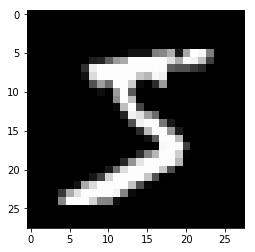

In [5]:
#Lets have a look at a sample image in the training data
plt.imshow(x_train[0],cmap='gray', interpolation='none')

In [8]:
# We now have to engineer the image data into the right form
# For CNN, we would need the data in Height x Width X Channels 
# form Since the image is in grayscale, we will use channel = 1
channel =1
x_train = x_train.reshape(training_samples, 
                          height,width,channel).astype('float32')
x_test = x_test.reshape(testing_samples, 
                        height, width,channel).astype('float32')

In [10]:
# To improve the training process, we would need to standardize 
# or normalize the values We can achieve this using a simple
# divide by 256 for all values

x_train = x_train/255
x_test =x_test/255

#Total number of digits  =10
target_classes = 10
# numbers 0-9, so ten classes
n_classes = 10
# convert integer labels into one-hot vectors
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [11]:
#Designing the CNN Model
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(height,width ,1), 
activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', 
optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.1085 - acc: 0.6369 - val_loss: 0.4134 - val_acc: 0.8731
Epoch 2/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.4071 - acc: 0.8739 - val_loss: 0.2797 - val_acc: 0.9178
Epoch 3/10
60000/60000 [==============================] - 27542s 459ms/step - loss: 0.2972 - acc: 0.9086 - val_loss: 0.2042 - val_acc: 0.9398
Epoch 4/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2303 - acc: 0.9293 - val_loss: 0.1604 - val_acc: 0.9532
Epoch 5/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1875 - acc: 0.9424 - val_loss: 0.1380 - val_acc: 0.9592
Epoch 6/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.1577 - acc: 0.9522 - val_loss: 0.1078 - val_acc: 0.9670
Epoch 7/10
60000/60000 [==============================] - 130s 2ms/ste

In [13]:
metrics = model.evaluate(x_test, y_test, verbose=0)
for i in range(0,len(model.metrics_names)):
    print(str(model.metrics_names[i])+" = "+str(metrics[i]))

loss = 0.06376617557471619
acc = 0.9792


# RNN

popularly known as “sequence models.” This name became popular 
because RNN makes use of sequential information. So far, all the DNNs 
that we have explored process training data with the assumption that 
there is no relationship between any two training samples. However, this 
is an issue for many problems that we can solve using data. Consider 
the predictive text feature in your iOS or Android phone; the prediction 
of the next word is highly dependent on the last few words you already 
typed. That’s where the sequential model comes into the picture. RNNs 
can also be understood as neural networks with memory. It connects 
a layer to itself and thereby gets simultaneous access to two or more 
consecutive input samples to process the end output. This property is 
unique to RNN, and with its rise in research, it delivered amazing success 
in the field of natural language understanding. All the legacy natural 
language processing techniques could now be significantly improved 
with RNNs. The rise of chatbots, improved autocorrect in text messaging, 
suggested reply in e-mail clients and other apps, and machine translation 
(i.e., translating text from a source language to a target language, Google 
Translate being the classic example) have all been propelled with the adoption of RNN. There are again different types of LSTM (long short-term 
memory) networks that overcome the limitations within the existing RNN 
architecture and take performance for natural language processing–related 
tasks a notch higher. The most popular versions of RNN are LSTM and 
GRU (gated recurrent unit) networks.

we will have a look at a simple (hello 
world equivalent) sample implementation for RNN/LSTM networks. 
The following code snippet performs a binary classification on the IMDB 
reviews dataset within Keras. It is a use case where we are provided with 
user reviews (text date) and an associated outcome as Positive or Negative.

In [1]:
#Import the necessary packages
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
#Setting a max cap for the number of distinct words
top_words = 5000
#Loading the training and test data from keras datasets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = top_words)

#Since the length of each text will be varying
#We will pad the sequences (i.e. text) to get a uniform length 
# throughout
max_text_length = 500

x_train = sequence.pad_sequences(x_train, maxlen=max_text_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_text_length)

In [4]:
#Design the network
embedding_length = 32

model = Sequential()

model.add(Embedding(top_words, 
                    embedding_length, 
                    input_length=max_text_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#Compile the  model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#Fit the model
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=3, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 376s 15ms/step - loss: 0.5083 - acc: 0.7461 - val_loss: 0.5600 - val_acc: 0.7079
Epoch 2/3
25000/25000 [==============================] - 406s 16ms/step - loss: 0.4421 - acc: 0.7877 - val_loss: 0.4030 - val_acc: 0.8184
Epoch 3/3
25000/25000 [==============================] - 384s 15ms/step - loss: 0.2885 - acc: 0.8829 - val_loss: 0.3247 - val_acc: 0.8652


In [6]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy:",scores[1])

Accuracy: 0.86524
